# Libraries

In [2]:
import cv2
import matplotlib.pyplot as plt  
%matplotlib inline
import numpy as np
from skimage import io



# Dataset Import and Data Preprocessing 

In [1]:
#import Dataset Library 
#Files to be processed

        #from google.colab import drive
        #drive.mount('/content/gdrive')



Mounted at /content/gdrive


In [8]:
#Import images to read 

#folder = os.path.join('/content/drive/My Drive/epoch100')
import os
os.getcwd()
#collection = '/content/drive/My_Drive/epoch100/'
collection_damage = "C:/Users/mechanika/Dropbox/School/CPSC 483 Machine Learning/Project-Main/project-main/epoch100/seg_test"
collection_ori = "C:/Users/mechanika/Dropbox/School/CPSC 483 Machine Learning/Project-Main/project-main/epoch100/seg_pred"

for i, filename in enumerate(os.listdir(collection_damage)):
   damaged_images = cv2.imread("a"+str(i)+".png")

for i, filename in enumerate(os.listdir(collection_ori)):
   ori_images = cv2.imread("a"+str(i)+".png")

TypeError: 'NoneType' object is not callable

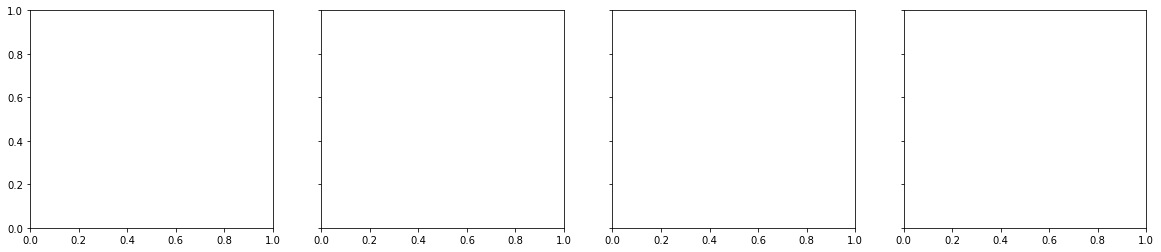

In [12]:
#Data Preprocessing through Normalization
#This is used to normalize an image which converts the RGB data of an image into a range of integers

# plotting the original image and the RGB channels
i, (im1, im2, im3, im4) = plt.subplots(1, 4, sharey=True)
i.set_figwidth(20)

damage_1 = damaged_images("a0.png") 

im1.imshow(damage_1)  #Original image
im2.imshow(damage_1[:, : , 0]) #Red
im3.imshow(damage_1[:, : , 1]) #Green
im4.imshow(damage_1[:, : , 2]) #Blue
i.suptitle('Original & RGB image channels')

#for i, filename in enumerate(os.listdir(collection_damage)):
#    gray_images = damaged_images.color.rgb2gray(damaged_images)
gray_image = damage_1.color.rgb2gray(damage_1)
#    norm_image = (gray_images - np.min(gray_images)) / (np.max(gray_images) - np.min(gray_images))
norm_image = (gray_image - np.min(gray_image)) / (np.max(gray_image) - np.min(gray_image))


# Training Data using an ML algorithm

In [ ]:
#Read mask
#expand this by bringing on perhaps Clustering?
#certainly not KNN
mask_path = "Mask.tiff"
mask = cv2.imread(mask_path, 0)

# Testing Data by fixing the Images


In [ ]:
#Use cv2 to read and fix the damaged image
damaged_images = cv2.cvtColor(damaged_images, cv2.COLOR_BGR2RGB)

In [ ]:
#print both the mask and the fixed image
output1 = cv2.inpaint(damaged_image, mask, 1, cv2.INPAINT_TELEA)
output2 = cv2.inpaint(damaged_image, mask, 1, cv2.INPAINT_NS)

# Show Before and After Restoration


In [ ]:
#show plot
img = [damaged_image, mask, output1, output2]
titles = ['damaged image', 'mask', 'TELEA', 'NS']
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.title(titles[i])
    plt.imshow(img[i])
plt.show()

#  Predictions and Confusion Matrix


In [ ]:
#confusion matrix
#this is supposed to show the accuracy of algorithm
cm = metrics.confusion_matrix(test_imgs, ori_images)
ax = sns.heatmap(cm, annot=True, 
                 xticklabels = use_cats,
                 yticklabels = use_cats,
                 fmt='3d')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')